In [1]:
import sys, datetime
from qick.asm_v2 import QickSweep1D

sys.path.append("../Libraries") # replace this with your location of the Libraries folder
from rabi_gain_sweep import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load Autonics TM4 Driver


  0%|          | 0/2000000 [00:00<?, ?it/s]

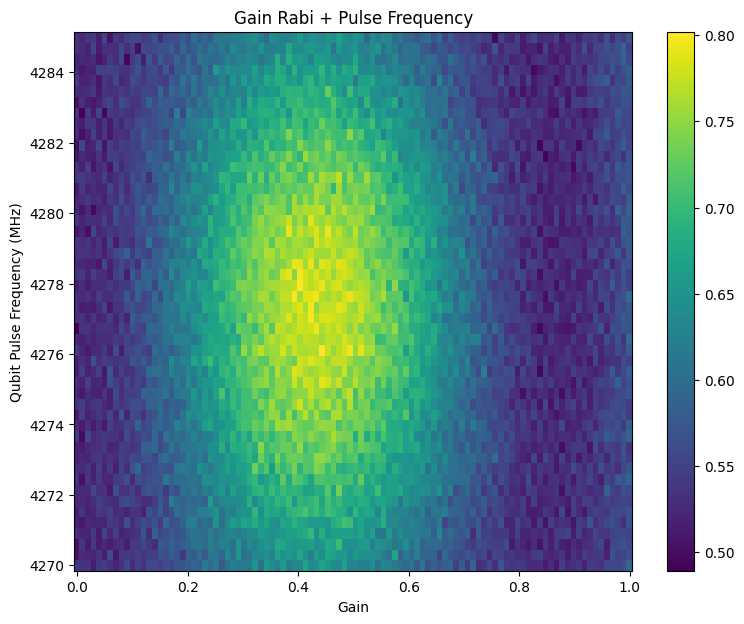

Creating directory G:\My Drive\chatot\data\rabi_gain_sweep\2025_05_26\03;27;53\
Data saved to G:\My Drive\chatot\data\rabi_gain_sweep\2025_05_26\03;27;53\data.h5
Config saved to G:\My Drive\chatot\data\rabi_gain_sweep\2025_05_26\03;27;53\cfg.json


In [5]:
date = str(datetime.datetime.now().strftime('%Y_%m_%d'))
time = str(datetime.datetime.now().strftime('%H;%M;%S'))

datapath = f'G:\\My Drive\\chatot\\data\\rabi_gain_sweep\\{date}\\{time}\\' # replace this with your data location

config_file = f"..\\..\\..\\..\\cfg\\llosta.json" # replace this with your config

meas = rabi_gain_sweep(path=datapath, config_file=config_file)

min_gain = 0
max_gain = 1
min_freq = 4270
max_freq = 4285

meas.cfg.expt = {
    "n_avg": 400,
    "res_freq": 5990.5,
    "res_gain": 0.03,
    "res_pulse_len": 5, 
    "res_phase": 0,
    "qubit_pulse_len": 0.18, 
    "qubit_gain": QickSweep1D('gain_loop', min_gain, max_gain),
    "qubit_freq": QickSweep1D('freq_loop', min_freq, max_freq),
    "qubit_phase": 0,
    "trig_offset": 0.5,
    "relaxation_time": 200,
    "freq_steps": 50,
    "min_gain": min_gain,
    "max_gain": max_gain,
    "gain_steps": 100,
    "min_freq": min_freq,
    "max_freq": max_freq
}

meas.acquire()
meas.display(save=True)
meas.savedata()